In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from pathlib import Path

from pandas import testing as tm

from sklearn.metrics import mean_absolute_error

import lib

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

sns.set_theme(style="whitegrid", palette="muted")

sns.color_palette()

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

Функция поиска выбросов и диапазона

In [4]:
def plotMovingAverage(series: pd.DataFrame, window: int, plot_intervals: bool = False, scale: int = 1.96, plot_anomalies: bool = False) -> None:

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(20,8))
    plt.title("Скользящее среднее\n размер окна = {}".format(window))
    plt.plot(rolling_mean, "r", label="Скользящее среднее")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "g--", label="Верхняя / нижняя граница")
        plt.plot(lower_bond, "g--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Истинные значения")
    plt.legend(loc="upper left")
    plt.grid(True)

## Анализ исходных данных по автоклаву AC104



### Подготовка данных

Загрузим данные и заменим названия колонок.

In [5]:
WORK_DIR = "C:\\Users\\Laevskiy\Desktop\\05-22\\AC104"

In [6]:
filepath = Path(f'./{WORK_DIR}/df_total_ds_1h.zip')
df = pd.read_csv(filepath, index_col=0)
df.index.name = None
df.index = pd.to_datetime(df.index)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24616 entries, 2019-01-01 07:00:00 to 2021-12-31 17:00:00
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   320PU108M01         24616 non-null  float64
 1   320PU222M01         24616 non-null  float64
 2   320RC104DIC02       24616 non-null  float64
 3   330AC104FI06        24616 non-null  float64
 4   330AC104FI07        24616 non-null  float64
 5   330AC104FI08        24616 non-null  float64
 6   330AC104FI09        24616 non-null  float64
 7   330AC104FI10        24616 non-null  float64
 8   330AC104FI51        24616 non-null  float64
 9   330AC104FI52        24616 non-null  float64
 10  330AC104FIC40       24616 non-null  float64
 11  330AC104FICZ01      24616 non-null  float64
 12  330AC104FICZ02      24616 non-null  float64
 13  330AC104FICZ03      24616 non-null  float64
 14  330AC104FICZ04      24616 non-null  float64
 15  330AC104FICZ05    

In [9]:
cols = [
    'Fel_1',
    'Fel_2',
    'D_SL',
    'QQ_C1',
    'QQ_C2',
    'QQ_C3',
    'QQ_C4',
    'QQ_C5',
    'O2_tot',
    'QQ_tot',
    'Sl_tot',
    'O2_C1',
    'O2_C2',
    'O2_C3',
    'O2_C4',
    'O2_C5',
    'AC_level',
    'AC_rbk_open',
    'AC_valve_open',
    'P_H2O',
    'P_O2',
    'P_tot',
    'P_valve',
    'P_tot_2',
    'T_C1',
    'T_C2',
    'T_C3',
    'T_C4',
    'T_C5',
    'T_abg',
    'P_O2_in',
    'FT1_level',
    'FT1_P',
    'FT1_T_in',
    'FT1_T',
    'FT2_level',
    'FT2_P',
    'FT2_T',
    'Cond_Q',
    'Cond_level',
    'Cond_valve',
    'O2_conc_1',
    'O2_conc_2',
    'Fe',
    'Stot',
    'SO4',
    'As',
    'Corg',
    'Ctot',
    'Fe2+',
    'D_S',
    'D_SL_H'
]

In [10]:
df.columns = cols

In [11]:
df.head()

,Fel_1,Fel_2,D_SL,QQ_C1,QQ_C2,QQ_C3,QQ_C4,QQ_C5,O2_tot,QQ_tot,...,O2_conc_2,Fe,Stot,SO4,As,Corg,Ctot,Fe2+,D_S,D_SL_H
2019-01-01 07:00:00,39.46,0.00,"1,599.54",16.33,29.56,16.01,0.80,0.00,"5,314.16",62.70,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.01,"3,900.00","1,625.00"
2019-01-01 08:00:00,37.42,0.00,"1,599.38",16.73,28.85,14.34,0.65,0.00,"5,191.72",60.56,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.01,NaN,NaN
2019-01-01 09:00:00,39.50,0.00,"1,599.55",15.93,29.09,14.25,0.63,0.00,"5,305.89",59.91,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1.01,NaN,NaN
2019-01-01 10:00:00,39.46,0.00,"1,599.65",16.31,29.52,15.95,0.71,0.00,"5,307.23",62.49,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.78,NaN,NaN
2019-01-01 11:00:00,39.47,0.00,"1,599.58",16.16,29.41,15.97,0.74,0.00,"5,312.83",62.28,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.78,NaN,NaN


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fel_1,"24,616.00",16.04,19.67,0.00,0.00,0.00,39.45,50.55
Fel_2,"24,616.00",13.93,19.31,0.00,0.00,0.00,32.00,50.52
D_SL,"24,616.00","1,411.60",329.32,975.12,"1,000.29","1,604.27","1,658.91","2,032.16"
QQ_C1,"24,616.00",8.66,8.49,-0.02,0.00,7.59,14.58,37.04
QQ_C2,"24,616.00",19.99,15.60,0.00,0.06,27.60,33.24,46.08
QQ_C3,"24,616.00",10.81,8.36,-0.03,-0.02,14.62,17.92,22.95
QQ_C4,"24,616.00",3.56,3.17,0.00,0.01,3.49,6.28,11.43
QQ_C5,"24,616.00",0.60,0.76,0.00,0.00,0.40,0.71,3.48
O2_tot,"24,616.00","3,613.88","2,721.78",-11.86,-1.48,"4,951.69","5,575.45","11,000.00"
QQ_tot,"24,616.00",43.62,33.78,-0.00,0.08,57.26,71.02,104.48


Добавим некоторые новые признаки и уберем данные, за то время когда автоклав не работал.

Уберем данные за время простоев автоклава
Заполним данные ХА - df.loc[:, ['Fe']].interpolate(method='time') https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

In [13]:
df[['Fel_1', 'Fel_2']].describe()

,Fel_1,Fel_2
count,"24,616.00","24,616.00"
mean,16.04,13.93
std,19.67,19.31
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,39.45,32.00
max,50.55,50.52


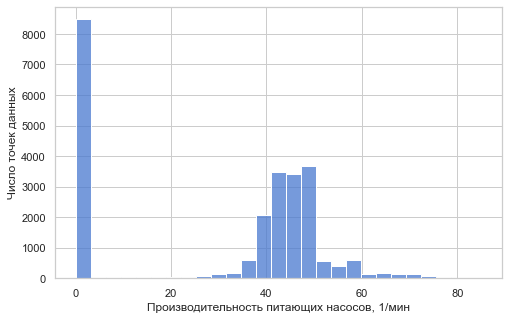

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(df['Fel_1']+df['Fel_2'], ax=ax)

ax.set_xlabel('Производительность питающих насосов, 1/мин')
ax.set_ylabel('Число точек данных')

plt.show();


Для порога оценки работы питающих насосов возьмем значение 20 шагов, будем сравнивать сумму двух насосов.

In [16]:
df = df.assign(work = np.where((df['Fel_1'] + df['Fel_2'] >= 20), 1, 0))

In [17]:
df.work.value_counts()

1    15981
0     8635
Name: work, dtype: int64

Создадим новый массив данных убрав простои автоклава.

In [18]:
df_work = df.drop(df[df['work'] == 0].index).drop('work', axis=1)

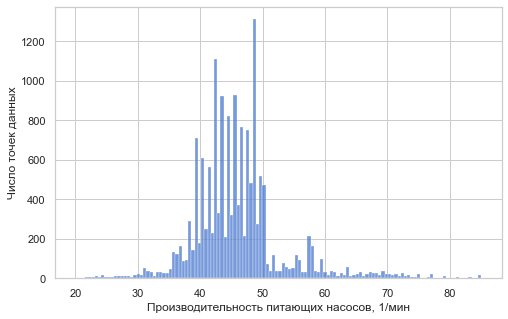

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(df_work['Fel_1']+df['Fel_2'], ax=ax)

ax.set_xlabel('Производительность питающих насосов, 1/мин')
ax.set_ylabel('Число точек данных')

plt.show();

Перейдем к пункту 2. Заполним недостающие строки по ХА.

In [20]:
int_cols = [
    'Fe',
    'Stot',
    'SO4',
    'As',
    'Corg',
    'Ctot',
    'D_S',
    'D_SL_H'
]

df_work[int_cols] = df_work.loc[:, int_cols].interpolate(method='time')
    

Сохраним полученный файл

In [21]:
comp = {
        'method': 'zip',
        'archive_name': 'out.csv'
    }

filepath = Path(f'./{WORK_DIR}/df_work_ds.zip')

df_work.to_csv(filepath, compression=comp)

Если мы не изменяем исходники, то просто загружаем файлик

In [22]:
df_work = pd.read_csv(f'{WORK_DIR}\df_work_ds.zip', index_col=0, parse_dates=True)

## Чистка данных для моделирования

Нужно добавить следующие данные:
   - Содержание твердого - C_S
   - Расход пульпы - Q_SL
   - Расход твердого - G_S
   - Расход серного эквивалента - G_Seq 
    
Константы:
   - Максимальная производительность насоса Feluwa 17,45 м³/ч
   - Максимальное число шагов 51
   - Мышьяк в СЭ - 0,371

In [23]:
FELUWA_MAX_Q = 17.45
FELUWA_MAX_N = 51
COEF_AS_SEQ = 0.371
D_WATER = 1000

In [24]:
fel_sum = df_work['Fel_1'] + df_work['Fel_2']

df_work = df_work.assign(Fel_sum = fel_sum.values)

In [25]:
df_work = df_work.assign(C_S = (df_work['D_S'] * D_WATER - df_work['D_SL_H'] * df_work['D_S']) / (df_work['D_SL_H'] * D_WATER - df_work['D_SL_H'] * df_work['D_S']) * 100)
df_work = df_work.assign(Q_SL = df_work['Fel_sum'] / FELUWA_MAX_N * FELUWA_MAX_Q)
df_work = df_work.assign(G_S = df_work['Q_SL'] * df_work['D_SL_H'] / 1000 * (df_work['C_S'] / 100))
df_work = df_work.assign(G_Seq = (COEF_AS_SEQ * df_work['As'] / 100 + df_work['Stot'] / 100) * df_work['G_S'])

В колонке SO4 много пропусков и нет доверия к анализу, уберем пока ее вообще.

In [26]:
df_work.drop('SO4', axis=1, inplace=True)

In [27]:
df_work.dropna(axis=0, inplace=True)

In [28]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15962 entries, 2019-01-02 00:00:00 to 2021-12-31 15:00:00
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Fel_1          15962 non-null  float64
 1   Fel_2          15962 non-null  float64
 2   D_SL           15962 non-null  float64
 3   QQ_C1          15962 non-null  float64
 4   QQ_C2          15962 non-null  float64
 5   QQ_C3          15962 non-null  float64
 6   QQ_C4          15962 non-null  float64
 7   QQ_C5          15962 non-null  float64
 8   O2_tot         15962 non-null  float64
 9   QQ_tot         15962 non-null  float64
 10  Sl_tot         15962 non-null  float64
 11  O2_C1          15962 non-null  float64
 12  O2_C2          15962 non-null  float64
 13  O2_C3          15962 non-null  float64
 14  O2_C4          15962 non-null  float64
 15  O2_C5          15962 non-null  float64
 16  AC_level       15962 non-null  float64
 17  AC_rbk_open    

In [99]:
df_work.describe().T

,count,mean,std,min,25%,50%,75%,max
Fel_1,"12,467.00",20.55,19.84,0.00,0.00,25.00,41.39,49.28
Fel_2,"12,467.00",25.02,19.35,0.00,0.00,31.57,42.28,50.00
D_SL,"12,467.00","1,530.71",258.60,975.69,"1,585.60","1,637.97","1,677.01","1,841.55"
QQ_C1,"12,467.00",14.40,8.69,0.00,6.87,14.81,20.21,39.86
QQ_C2,"12,467.00",29.90,7.76,0.01,27.50,31.67,34.69,42.97
QQ_C3,"12,467.00",16.75,3.19,-0.00,15.50,17.37,18.96,23.01
QQ_C4,"12,467.00",5.10,3.12,-0.01,1.73,5.17,8.28,9.95
QQ_C5,"12,467.00",1.26,0.90,0.00,0.62,0.98,1.78,7.77
O2_tot,"12,467.00","5,525.13",772.86,-1.38,"5,106.91","5,444.94","5,874.54","7,550.74"
QQ_tot,"12,467.00",67.41,14.37,0.01,58.82,66.80,79.07,98.51


## Проведем анализ статистик признаков

### Целевой признак -$Fe^{2+}$ 

In [29]:
df_work['Fe2+'].describe()

count   15,962.00
mean         0.74
std          0.92
min          0.00
25%          0.00
50%          0.68
75%          1.24
max         26.80
Name: Fe2+, dtype: float64

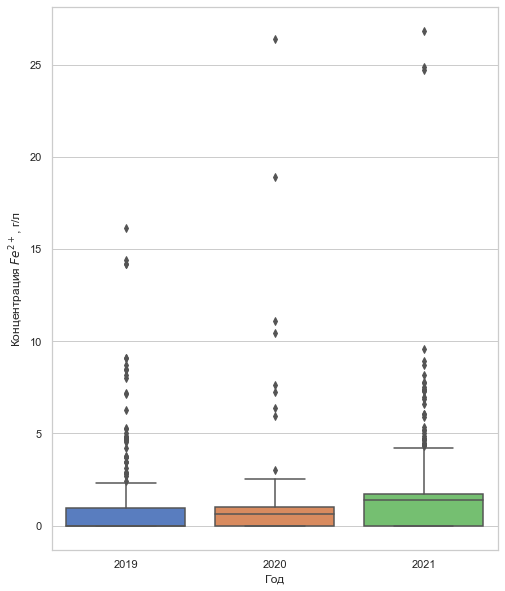

In [30]:
fig, ax = plt.subplots(figsize=(8, 10))

sns.boxplot(data=df_work, y='Fe2+', x=df_work.index.year);

ax.set_xlabel('Год')
ax.set_ylabel('Концентрация $Fe^{2+}$, г/л')

plt.show();

(0.0, 30.0)

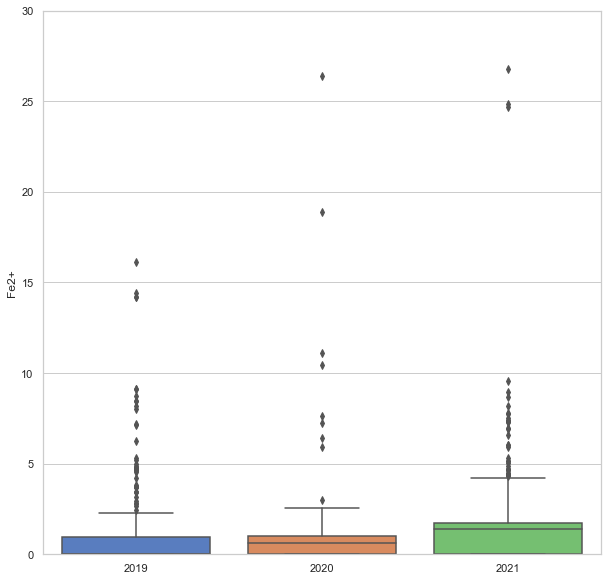

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.boxplot(data=df_work, y='Fe2+', x=df_work.index.year, ax=ax);
ax.set_ylim(0, 30)

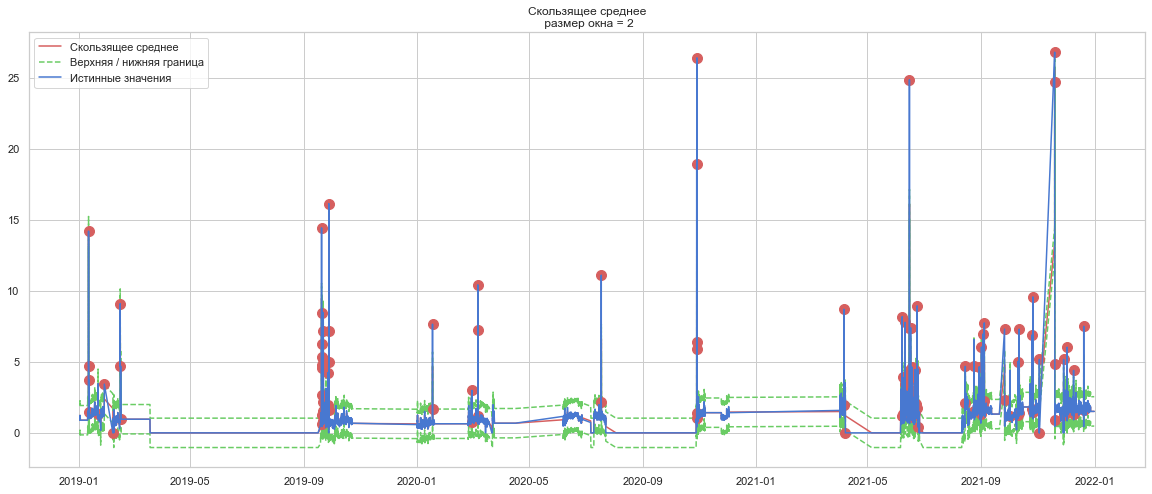

In [34]:
plotMovingAverage(df_work.loc[:, ['Fe2+']], window=2, plot_intervals=True, plot_anomalies=True, scale=3)

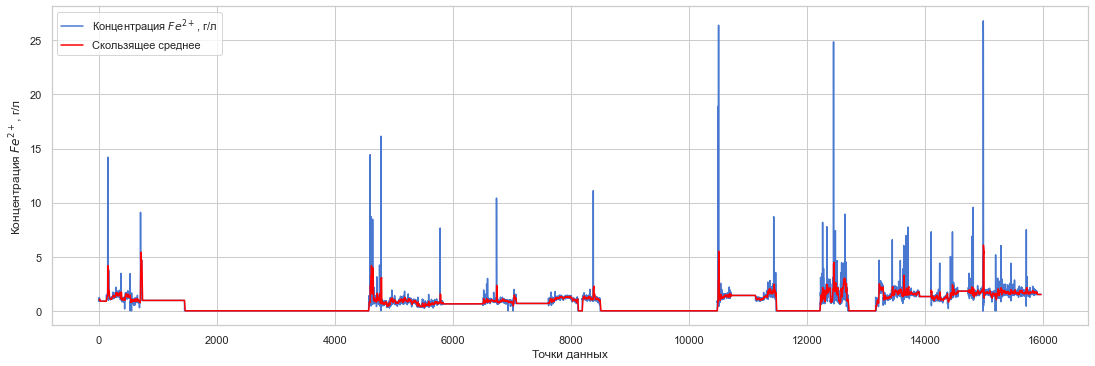

In [35]:
f, ax = plt.subplots(figsize=(15,5))

ax.plot(df_work['Fe2+'].values, label="Концентрация $Fe^{2+}$, г/л")

rolling_mean = df_work['Fe2+'].rolling(window=12).mean()
ax.plot(rolling_mean.values, c='red', label="Скользящее среднее")

f.tight_layout();

ax.set_ylabel('Концентрация $Fe^{2+}$, г/л')
ax.set_xlabel('Точки данных')

plt.legend()
plt.show();

In [36]:
df_work.loc[df_work['Fe2+'] > 10, :]

,Fel_1,Fel_2,D_SL,QQ_C1,QQ_C2,QQ_C3,QQ_C4,QQ_C5,O2_tot,QQ_tot,...,Corg,Ctot,Fe2+,D_S,D_SL_H,Fel_sum,C_S,Q_SL,G_S,G_Seq
2019-01-11 14:00:00,39.52,0.00,"1,699.74",12.67,25.39,15.66,3.28,0.00,"4,798.47",57.01,...,0.44,1.04,14.20,"3,900.00","1,597.81",39.52,50.32,13.52,10.87,3.42
2019-01-11 15:00:00,39.52,0.00,"1,699.79",11.39,29.08,13.41,3.58,2.52,"4,750.44",59.98,...,0.44,1.04,14.20,"3,900.00","1,597.50",39.52,50.30,13.52,10.86,3.42
2019-09-20 00:00:00,0.00,40.99,"1,567.11",2.90,8.10,5.40,4.48,0.68,"3,305.04",21.57,...,0.44,0.81,14.43,"3,500.00","1,567.78",40.99,50.70,14.03,11.15,3.14
2019-09-27 19:00:00,44.53,0.00,"1,568.42",5.13,18.36,12.36,5.07,0.45,"4,288.55",41.37,...,0.64,1.09,16.14,"3,500.00","1,573.00",44.53,51.00,15.24,12.22,3.94
2020-03-06 15:00:00,37.94,0.00,"1,651.53",6.32,28.17,12.64,3.90,1.33,"4,483.20",52.36,...,0.36,1.25,10.42,"3,800.00","1,611.00",37.94,51.47,12.98,10.77,2.88
2020-07-17 19:00:00,31.10,0.00,"1,622.60",8.07,23.44,8.53,4.80,0.47,"3,881.60",45.29,...,0.78,1.06,11.10,"3,920.00","1,674.00",31.10,54.05,10.64,9.63,3.04
2020-10-28 18:00:00,14.67,34.10,"1,711.55",14.78,26.77,18.76,3.90,0.42,"5,601.23",64.61,...,0.64,1.08,18.90,"3,900.00","1,678.17",48.77,54.35,16.69,15.22,4.32
2020-10-29 01:00:00,9.90,34.95,"1,694.33",15.02,25.75,15.46,2.36,0.44,"5,275.19",59.03,...,0.64,1.12,26.40,"3,900.00","1,682.00",44.85,54.53,15.35,14.07,4.05
2021-06-15 06:00:00,40.21,5.19,"1,582.11",3.98,4.07,4.16,1.45,0.43,"2,333.57",14.09,...,0.56,1.04,24.86,"3,400.00","1,540.42",45.41,49.70,15.54,11.89,3.49
2021-11-18 23:00:00,23.26,0.00,"1,714.41",6.39,7.08,0.25,0.02,0.33,"1,889.86",14.07,...,0.36,0.85,26.80,"3,503.92","1,698.88",23.26,57.57,7.96,7.79,2.13


In [37]:
df_work.loc[df_work['Fe2+'] == 0, :]

,Fel_1,Fel_2,D_SL,QQ_C1,QQ_C2,QQ_C3,QQ_C4,QQ_C5,O2_tot,QQ_tot,...,Corg,Ctot,Fe2+,D_S,D_SL_H,Fel_sum,C_S,Q_SL,G_S,G_Seq
2019-02-06 21:00:00,0.00,35.59,"1,882.58",10.56,31.87,13.36,1.38,0.00,"5,414.37",57.16,...,0.39,0.95,0.00,"3,900.00","1,601.54",35.59,50.51,12.18,9.85,3.08
2019-02-07 18:00:00,0.00,40.07,"1,582.48",9.29,31.54,15.05,2.34,0.00,"5,309.56",58.23,...,0.33,0.90,0.00,"3,900.00","1,576.42",40.07,49.17,13.71,10.63,3.34
2019-02-07 19:00:00,0.00,39.38,"1,582.63",9.92,31.04,14.24,1.95,0.00,"5,233.62",57.14,...,0.32,0.90,0.00,"3,900.00","1,574.00",39.38,49.04,13.47,10.40,3.27
2019-03-18 22:00:00,0.00,41.45,"1,630.03",18.96,27.16,14.11,1.69,0.00,"5,670.33",61.92,...,0.54,1.22,0.00,"3,900.00","1,613.54",41.45,51.14,14.18,11.70,3.37
2019-03-18 23:00:00,0.00,41.45,"1,633.02",18.75,27.10,13.90,1.65,0.05,"5,586.58",61.44,...,0.53,1.23,0.00,"3,900.00","1,612.78",41.45,51.10,14.18,11.69,3.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-11 13:00:00,0.00,23.33,"1,000.56",11.85,16.05,10.73,3.70,0.95,"3,039.25",43.28,...,0.54,0.65,0.00,"3,820.00","1,621.90",23.33,51.94,7.98,6.72,1.94
2021-11-02 05:00:00,20.50,20.97,"1,754.22",8.47,26.16,10.38,7.59,2.86,"6,159.32",55.47,...,0.48,1.08,0.00,"3,700.00","1,640.33",41.46,53.49,14.19,12.45,3.45
2021-11-02 12:00:00,20.67,21.14,"1,712.23",14.88,23.06,13.29,8.10,2.47,"6,255.17",61.78,...,0.48,1.08,0.00,"3,697.55","1,643.70",41.81,53.68,14.31,12.62,3.50
2021-11-28 06:00:00,49.95,0.00,"1,627.75",16.62,26.16,16.64,6.75,0.47,"4,853.96",66.64,...,0.34,0.92,0.00,"3,900.00","1,631.38",49.95,52.05,17.09,14.51,3.70


In [39]:
df_work.loc[df_work['Fe2+'] == 0, :]
df_work.loc[df_work['Fe2+'] == 0, :]= df.replace(0, np.nan)
df_work.loc[df_work['Fe2+'] == 0, :]= df.dropna(how='all', axis=0)

Оставшиеся выбросы не будем пока убирать, так как это могут быть технологические отклонения. Посмотрим как они будут описываться моделью.

In [40]:
less_one = df_work.loc[df_work['Fe2+'] <= 1, ['Fe2+']].count()
one_two = df_work.loc[(df_work['Fe2+'] > 1) & (df_work['Fe2+'] <= 2), ['Fe2+']].count()
more_two = df_work.loc[df_work['Fe2+'] > 2, ['Fe2+']].count()

print(less_one.values, one_two.values, more_two.values)

[4174] [4943] [443]


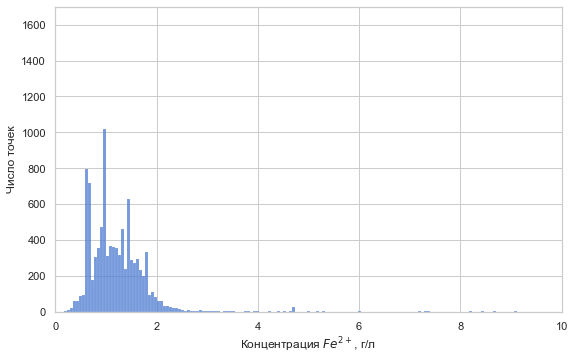

In [41]:

f, ax = plt.subplots(figsize=(8, 5))

sns.histplot(df_work['Fe2+'], ax=ax)

f.tight_layout();

ax.set_xlabel('Концентрация $Fe^{2+}$, г/л')
ax.set_ylabel('Число точек')

ax.set_ylim(0, 1700)
ax.set_xlim(0, 10)

plt.show();

### Анализ состава исходного сырья

Выделим нужные колонки и посмотрим на распределения данных.

В химическом анализе из баков питания могут быть выбросы или неправильные значения. В какие-то дни анализы могут быть неполными. Проверим по $Fe$ и $S_{tot}$.

In [42]:
df_work.loc[(df_work['Fe'] <= 10) & (df_work['Stot'] <= 10), ['Fe', 'Stot']].count()

Fe      0
Stot    0
dtype: int64

In [43]:
int_cols = [
    'Fe',
    'Stot',
    'As',
    'Corg',
    'Ctot'
]

df_work[int_cols].describe()

,Fe,Stot,As,Corg,Ctot
count,"9,674.00","9,686.00","9,675.00","9,685.00","9,686.00"
mean,26.33,25.94,7.86,0.65,1.09
std,2.77,2.36,2.00,2.08,0.26
min,16.41,19.10,1.70,0.11,0.35
25%,24.60,24.31,6.46,0.43,0.95
50%,26.43,26.30,8.05,0.51,1.05
75%,28.29,27.36,9.21,0.60,1.24
max,35.80,33.30,13.95,71.00,2.15


Посмотрим на анализ органического углерода, судя по исходному распределению, там есть выбросы и/или ошибки. Проверим точки где органического углерода по анализу больше общего. Попробуем приравнять в таких точках значение органического углерода к общему.

In [44]:
df_work.loc[df_work['Corg'] > df_work['Ctot'], 'Corg'] = df_work.loc[df_work['Corg'] > df_work['Ctot'], 'Ctot']

In [45]:
df_work.loc[df_work['Corg'] > df_work['Ctot']].count().sum()

0

In [46]:
df_work[int_cols].describe()

,Fe,Stot,As,Corg,Ctot
count,"9,674.00","9,686.00","9,675.00","9,685.00","9,686.00"
mean,26.33,25.94,7.86,0.54,1.09
std,2.77,2.36,2.00,0.23,0.26
min,16.41,19.10,1.70,0.11,0.35
25%,24.60,24.31,6.46,0.43,0.95
50%,26.43,26.30,8.05,0.51,1.05
75%,28.29,27.36,9.21,0.60,1.24
max,35.80,33.30,13.95,1.84,2.15


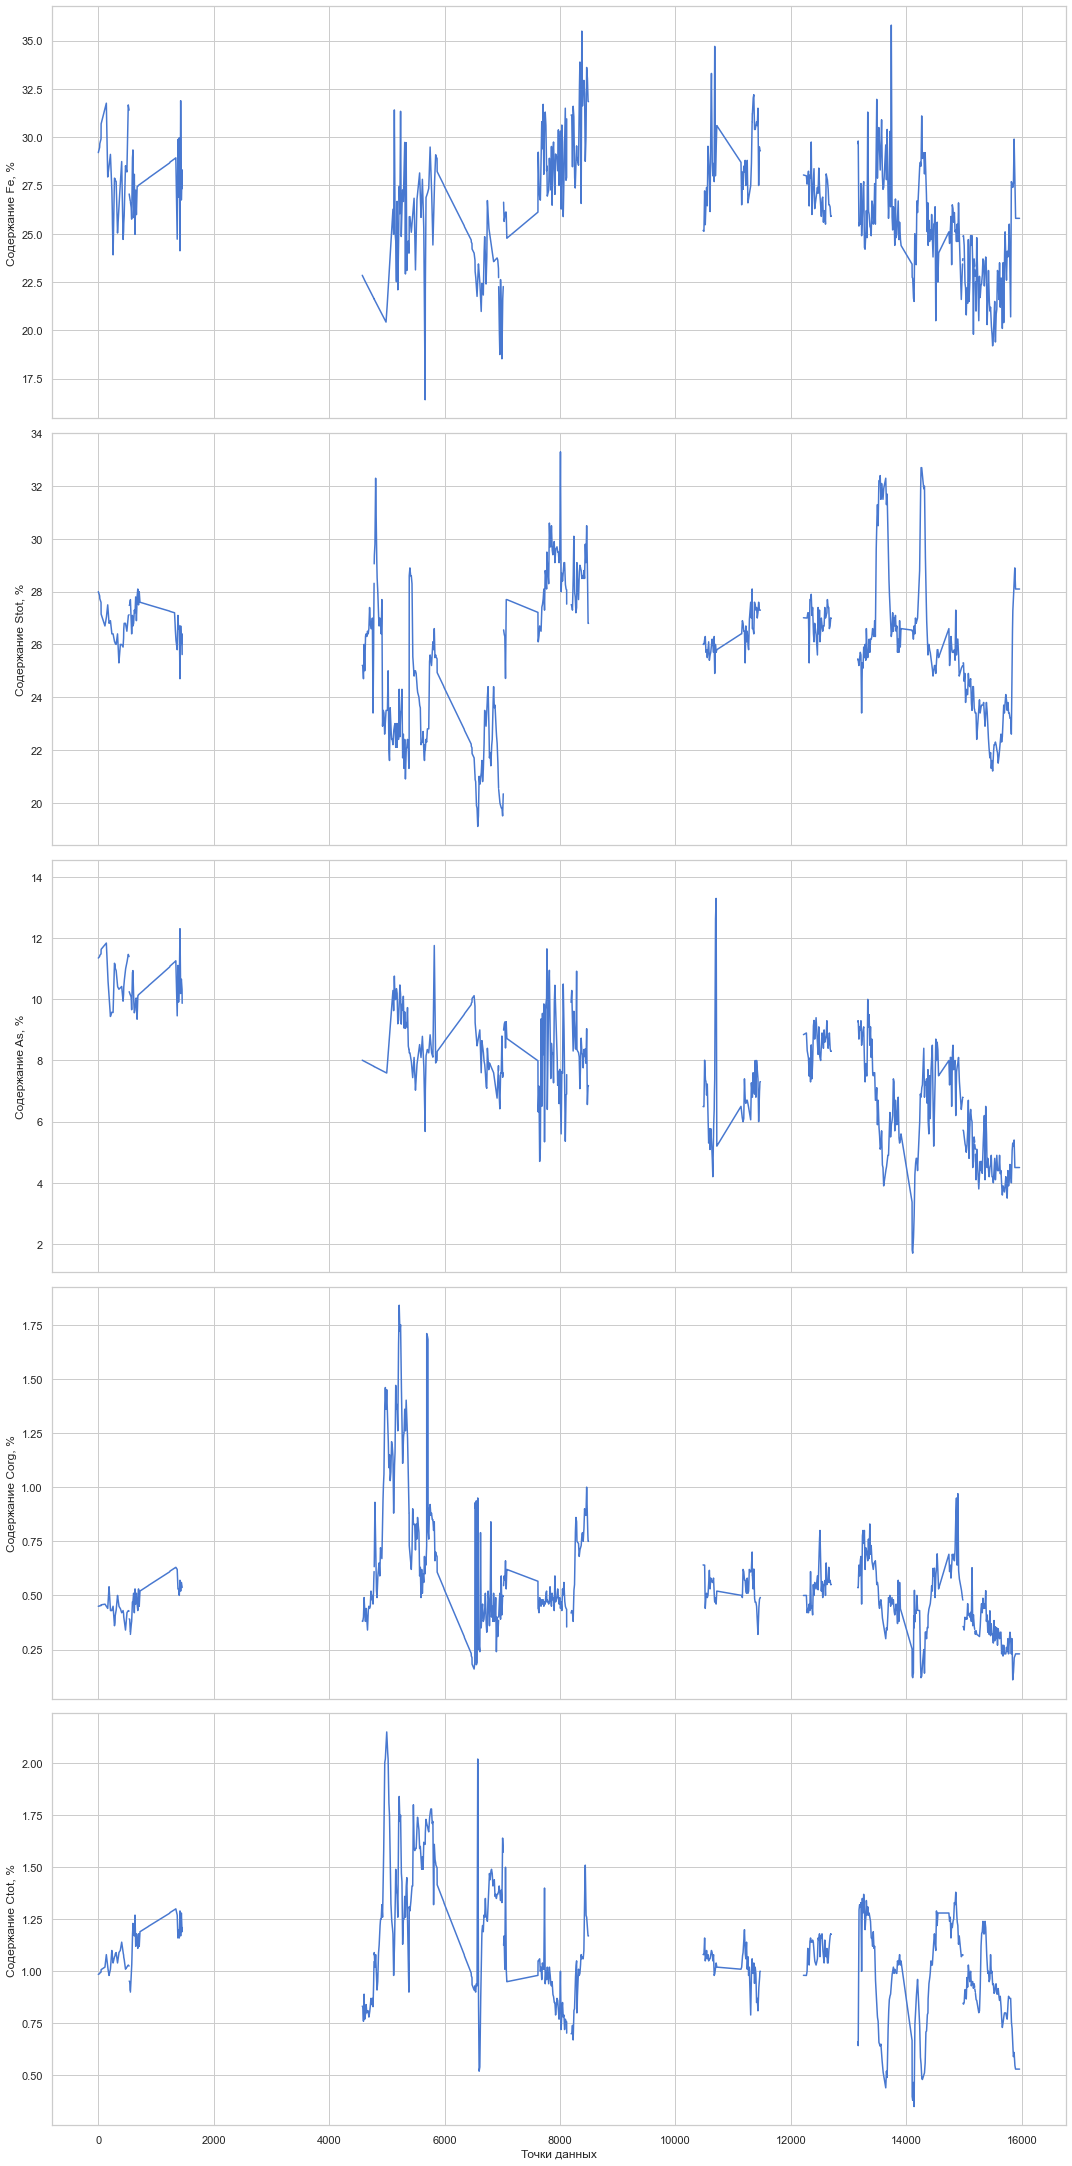

In [47]:
f, ax = plt.subplots(5, 1, figsize=(15,30), sharex=True)

for i, col in enumerate(int_cols):
    ax[i].plot(df_work[col].values)
    ax[i].set_ylabel(f'Содержание {col}, %')

f.tight_layout();

ax[4].set_xlabel('Точки данных')

plt.show();

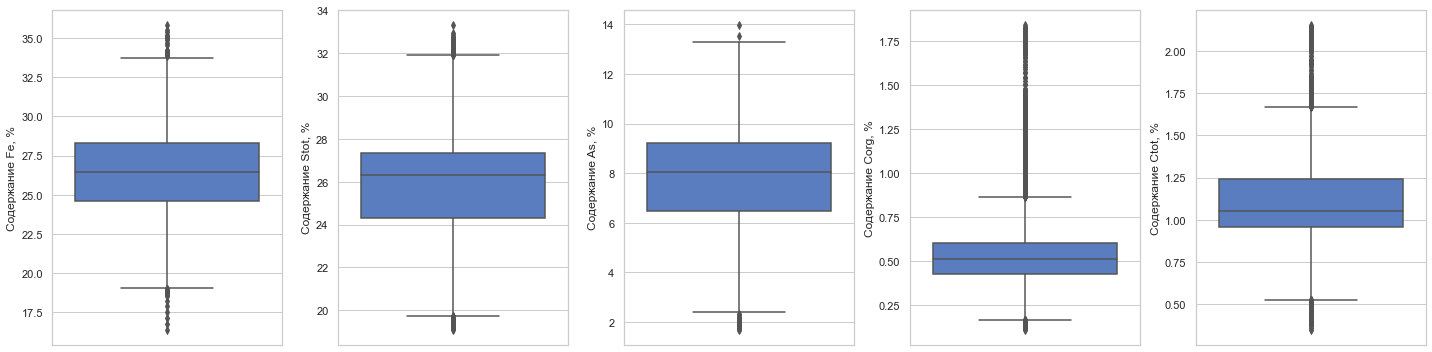

In [48]:
f, ax = plt.subplots(1, 5, figsize=(20,5))

for i, col in enumerate(int_cols):
    sns.boxplot(data=df_work, y=col, ax=ax[i])
    ax[i].set_ylabel(f'Содержание {col}, %')

f.tight_layout();

plt.show();

## Анализ данных работы автоклава

Насосы питания

In [49]:
df[['Fel_1', 'Fel_2']].describe().T

,count,mean,std,min,25%,50%,75%,max
Fel_1,"24,616.00",16.04,19.67,0.00,0.00,0.00,39.45,50.55
Fel_2,"24,616.00",13.93,19.31,0.00,0.00,0.00,32.00,50.52


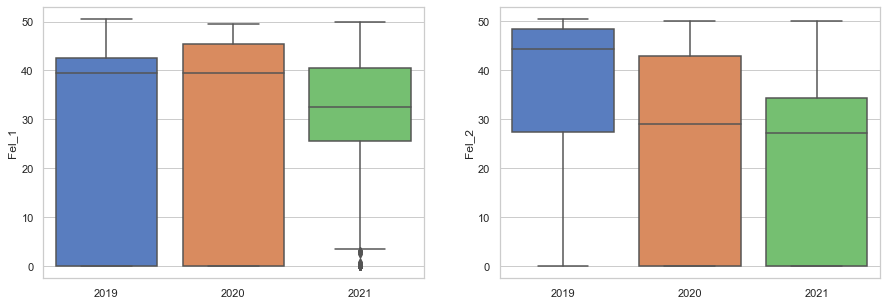

In [50]:
f, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df_work, y='Fel_1', ax=axs[0], x=df_work.index.year);
sns.boxplot(data=df_work, y='Fel_2', ax=axs[1], x=df_work.index.year);

Достаточно часто используемый в стаистике график, описывающий распределение параметра. Предполагается что распределение параметра носит нормальных характер. Описание графика boxplot:

<img src=".\working_data\Boxplot_vs_PDF.svg.png" width=30%>

*источник картинки wikipedia*



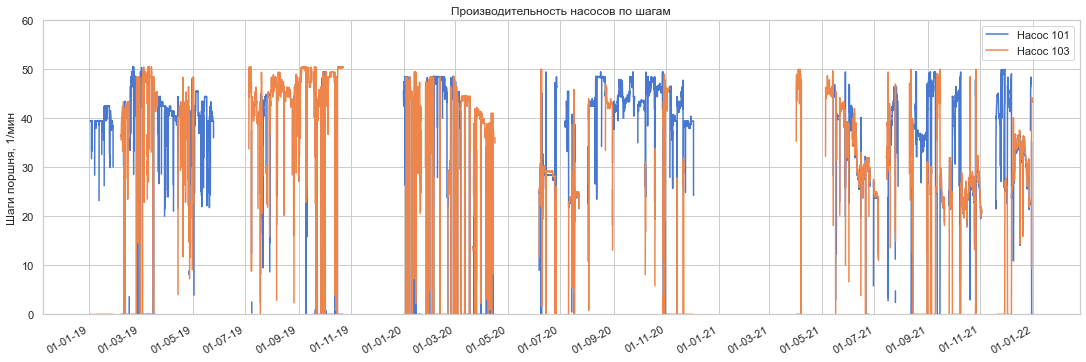

In [51]:
f, ax = plt.subplots(figsize=(15,5))

plt.plot(df_work['Fel_1'].resample('H').first().fillna(value=np.nan))
plt.plot(df_work['Fel_2'].resample('H').first().fillna(value=np.nan))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.set_ylim([0, 60])
ax.legend(['Насос 101', 'Насос 103'])

f.autofmt_xdate();
f.tight_layout();

ax.set_title('Производительность насосов по шагам')
ax.set_ylabel('Шаги поршня, 1/мин')

plt.show()

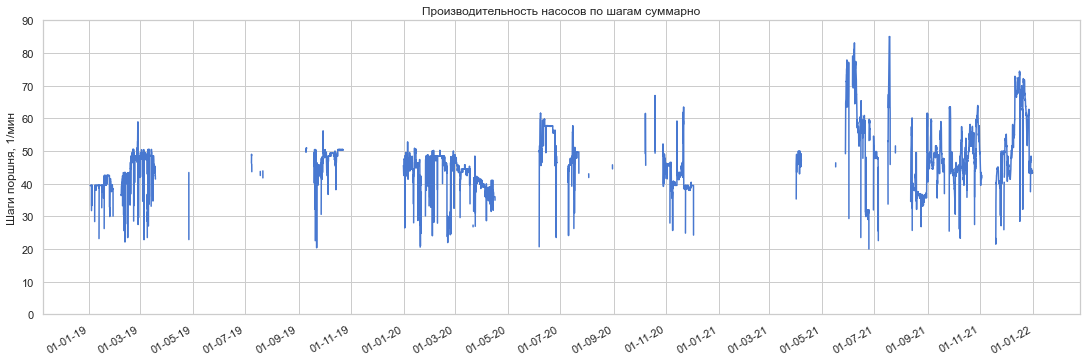

In [52]:
f, ax = plt.subplots(figsize=(15,5))

fel_sum = df_work['Fel_1'] + df_work['Fel_2']

plt.plot(fel_sum.resample('H').first().fillna(value=np.nan))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.set_ylim([0, 90])

f.autofmt_xdate();
f.tight_layout();

ax.set_title('Производительность насосов по шагам суммарно')
ax.set_ylabel('Шаги поршня, 1/мин')

plt.show();

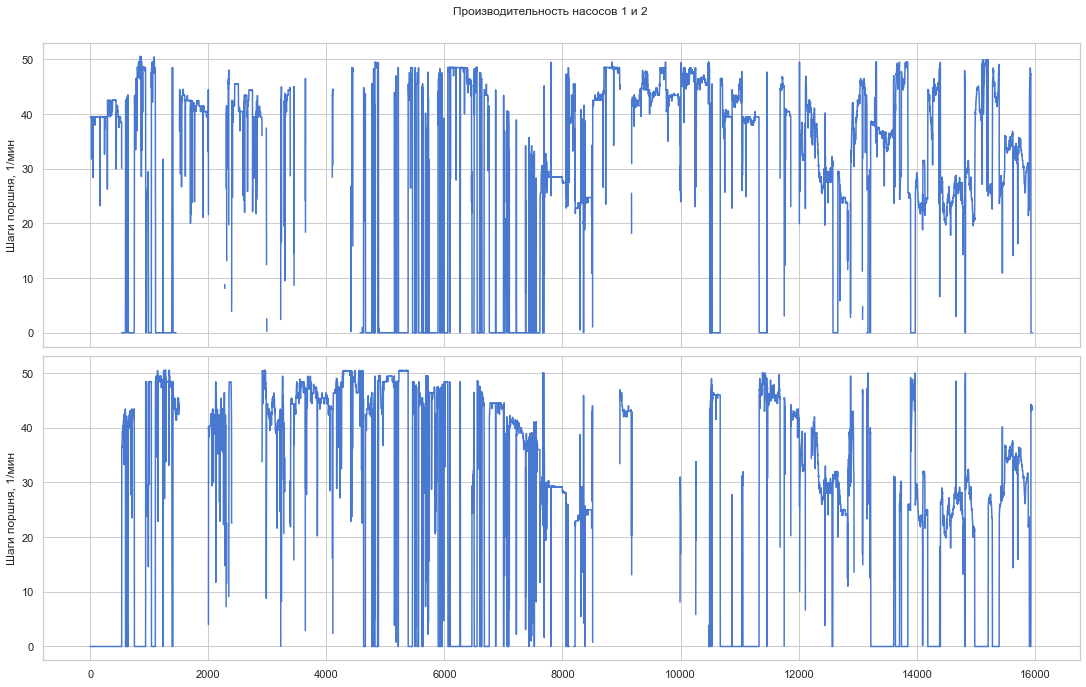

In [53]:
f, ax = plt.subplots(2, 1, figsize=(15,10), sharex=True)

ax[0].plot(df_work['Fel_1'].values)
ax[1].plot(df_work['Fel_2'].values)

f.tight_layout();

st = f.suptitle('Производительность насосов 1 и 2')
st.set_y(0.95)
f.subplots_adjust(top=0.9)

ax[0].set_ylabel('Шаги поршня, 1/мин')
ax[1].set_ylabel('Шаги поршня, 1/мин')

plt.show();

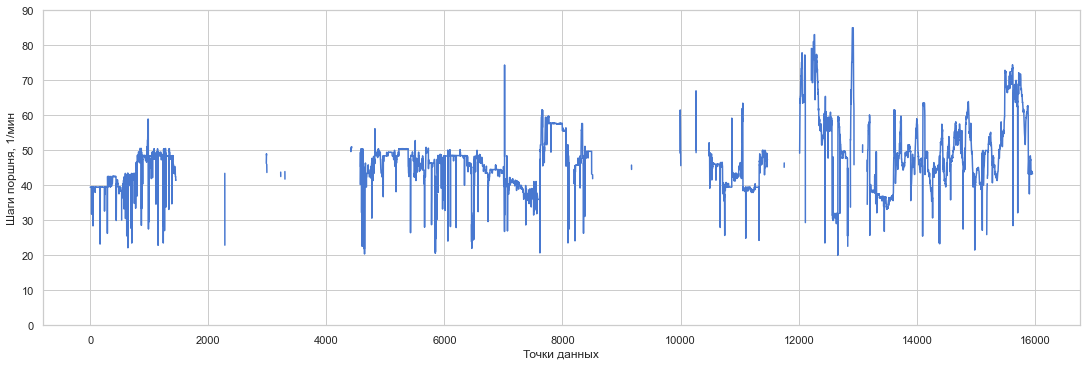

In [54]:
f, ax = plt.subplots(figsize=(15,5))

plt.plot(fel_sum.values)

ax.set_ylim([0, 90])

f.tight_layout();

ax.set_ylabel('Шаги поршня, 1/мин')
ax.set_xlabel('Точки данных')

plt.show();

### Плотность пульпы

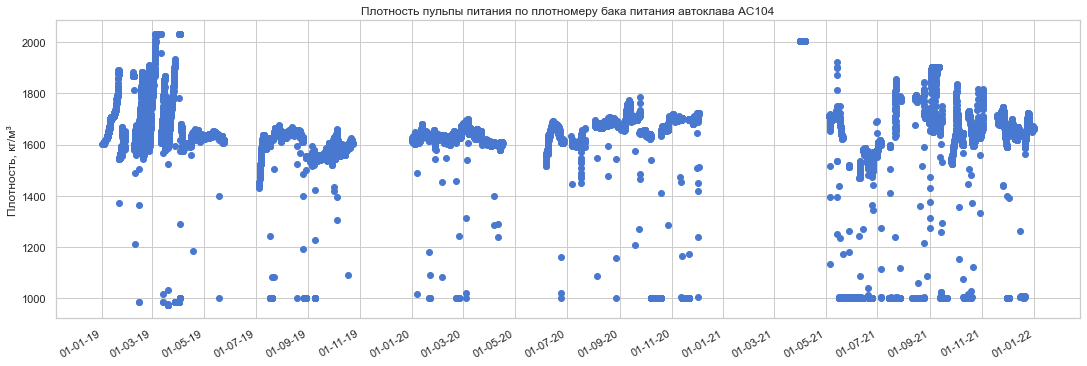

In [55]:
f, ax = plt.subplots(figsize=(15,5))

ax.scatter(df_work.index, df_work['D_SL'])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

f.autofmt_xdate();
f.tight_layout();

ax.set_title('Плотность пульпы питания по плотномеру бака питания автоклава АС104')
ax.set_ylabel('Плотность, кг/м³')

plt.show();

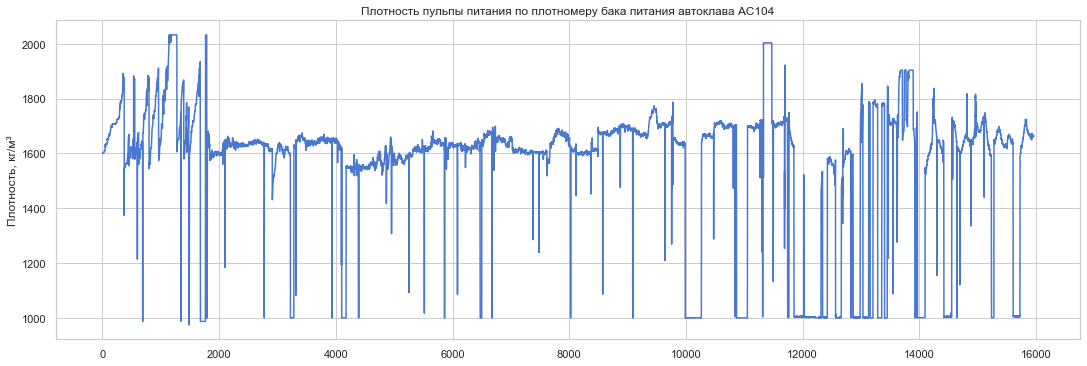

In [56]:
f, ax = plt.subplots(figsize=(15,5))

ax.plot(df_work['D_SL'].values)

f.tight_layout();

ax.set_title('Плотность пульпы питания по плотномеру бака питания автоклава АС104')
ax.set_ylabel('Плотность, кг/м³')

plt.show()

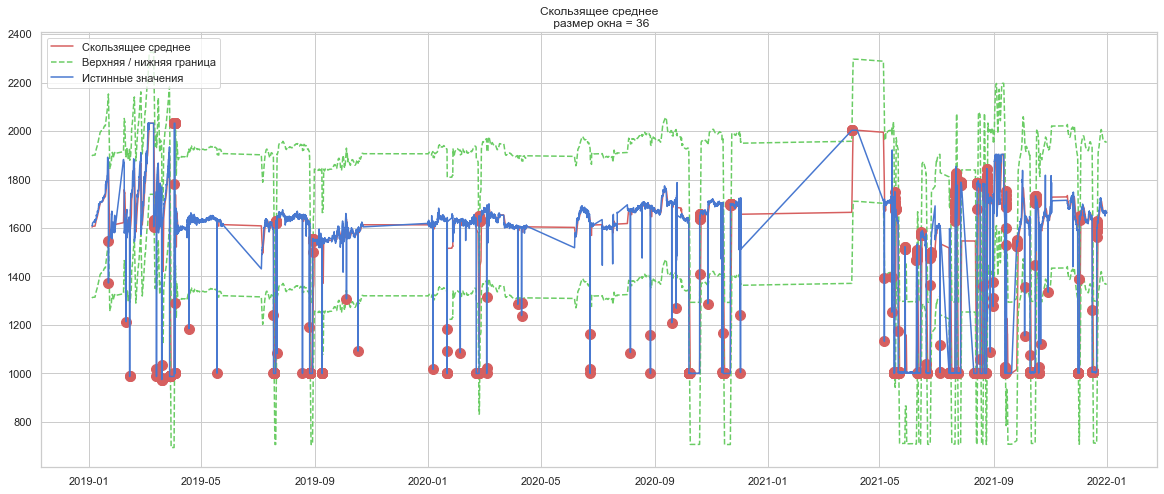

In [57]:
plotMovingAverage(df_work.loc[:, ['D_SL']], window=36, plot_intervals=True, plot_anomalies=True)

Разброс параметра большой. Скорее всего нужно будет корректировать по результатам ручных замеров.

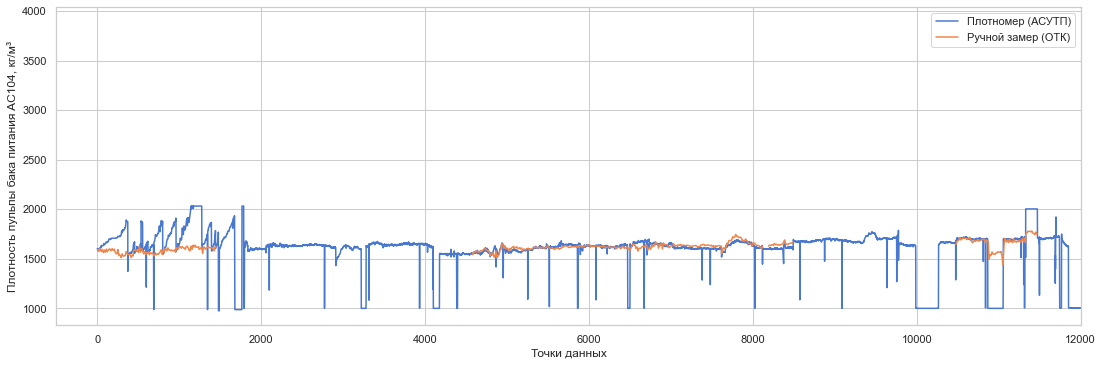

In [58]:
f, ax = plt.subplots(figsize=(15,5))

ax.plot(df_work['D_SL'].values, label="Плотномер (АСУТП)")
ax.plot(df_work['D_SL_H'].values, label="Ручной замер (ОТК)")

f.tight_layout();

ax.set_ylabel('Плотность пульпы бака питания AC104, кг/м³')
ax.set_xlabel('Точки данных')
ax.set_xlim(-500, 12000)

plt.legend()

plt.show();

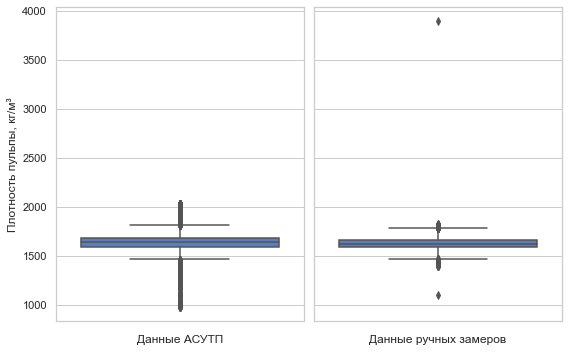

In [59]:
f, axs = plt.subplots(1, 2, figsize=(8, 5), sharey=True)

sns.boxplot(data=df_work, y='D_SL', ax=axs[0])
axs[0].set_ylabel('Плотность пульпы, кг/м³')
axs[0].set_xlabel('Данные АСУТП')

sns.boxplot(data=df_work, y='D_SL_H', ax=axs[1])
axs[1].set_ylabel('')
axs[1].set_xlabel('Данные ручных замеров')

f.tight_layout()

plt.show()

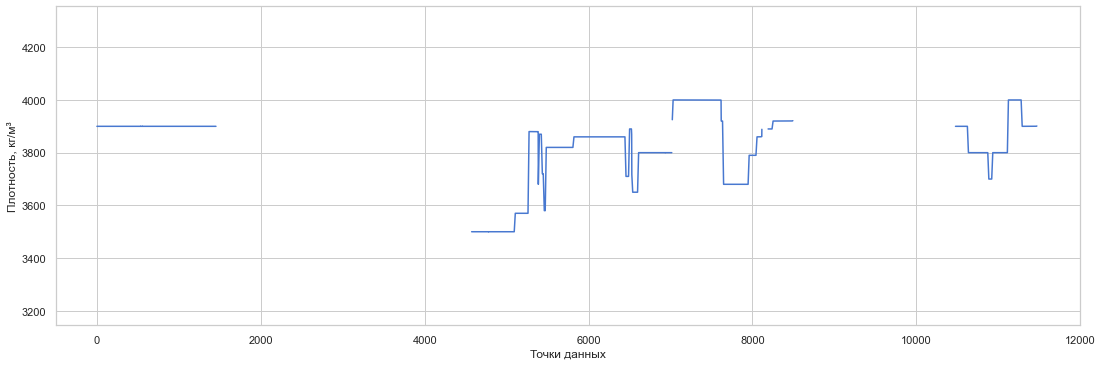

In [60]:
f, ax = plt.subplots(figsize=(15,5))

ax.plot(df_work['D_S'].values)

f.tight_layout();


ax.set_ylabel('Плотность, кг/м³')
ax.set_xlabel('Точки данных')
ax.set_xlim(-500, 12000)

plt.show();

### Расход воды по секциям и общий расход

In [61]:
QQ_cols = [
    'QQ_C1',
    'QQ_C2',
    'QQ_C3',
    'QQ_C4',
    'QQ_C5',
    'QQ_tot',
]

In [62]:
df_work[QQ_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
QQ_C1,"15,925.00",13.31,7.05,0.00,7.89,12.36,18.88,37.04
QQ_C2,"15,962.00",30.69,6.93,0.03,28.11,31.80,35.14,46.08
QQ_C3,"15,962.00",16.61,3.38,0.02,14.93,17.05,18.86,22.95
QQ_C4,"15,962.00",5.45,2.29,0.00,3.65,5.58,7.15,11.43
QQ_C5,"15,661.00",0.89,0.80,0.00,0.40,0.51,1.14,3.48
QQ_tot,"15,962.00",66.91,14.41,0.35,58.32,66.23,77.85,104.48


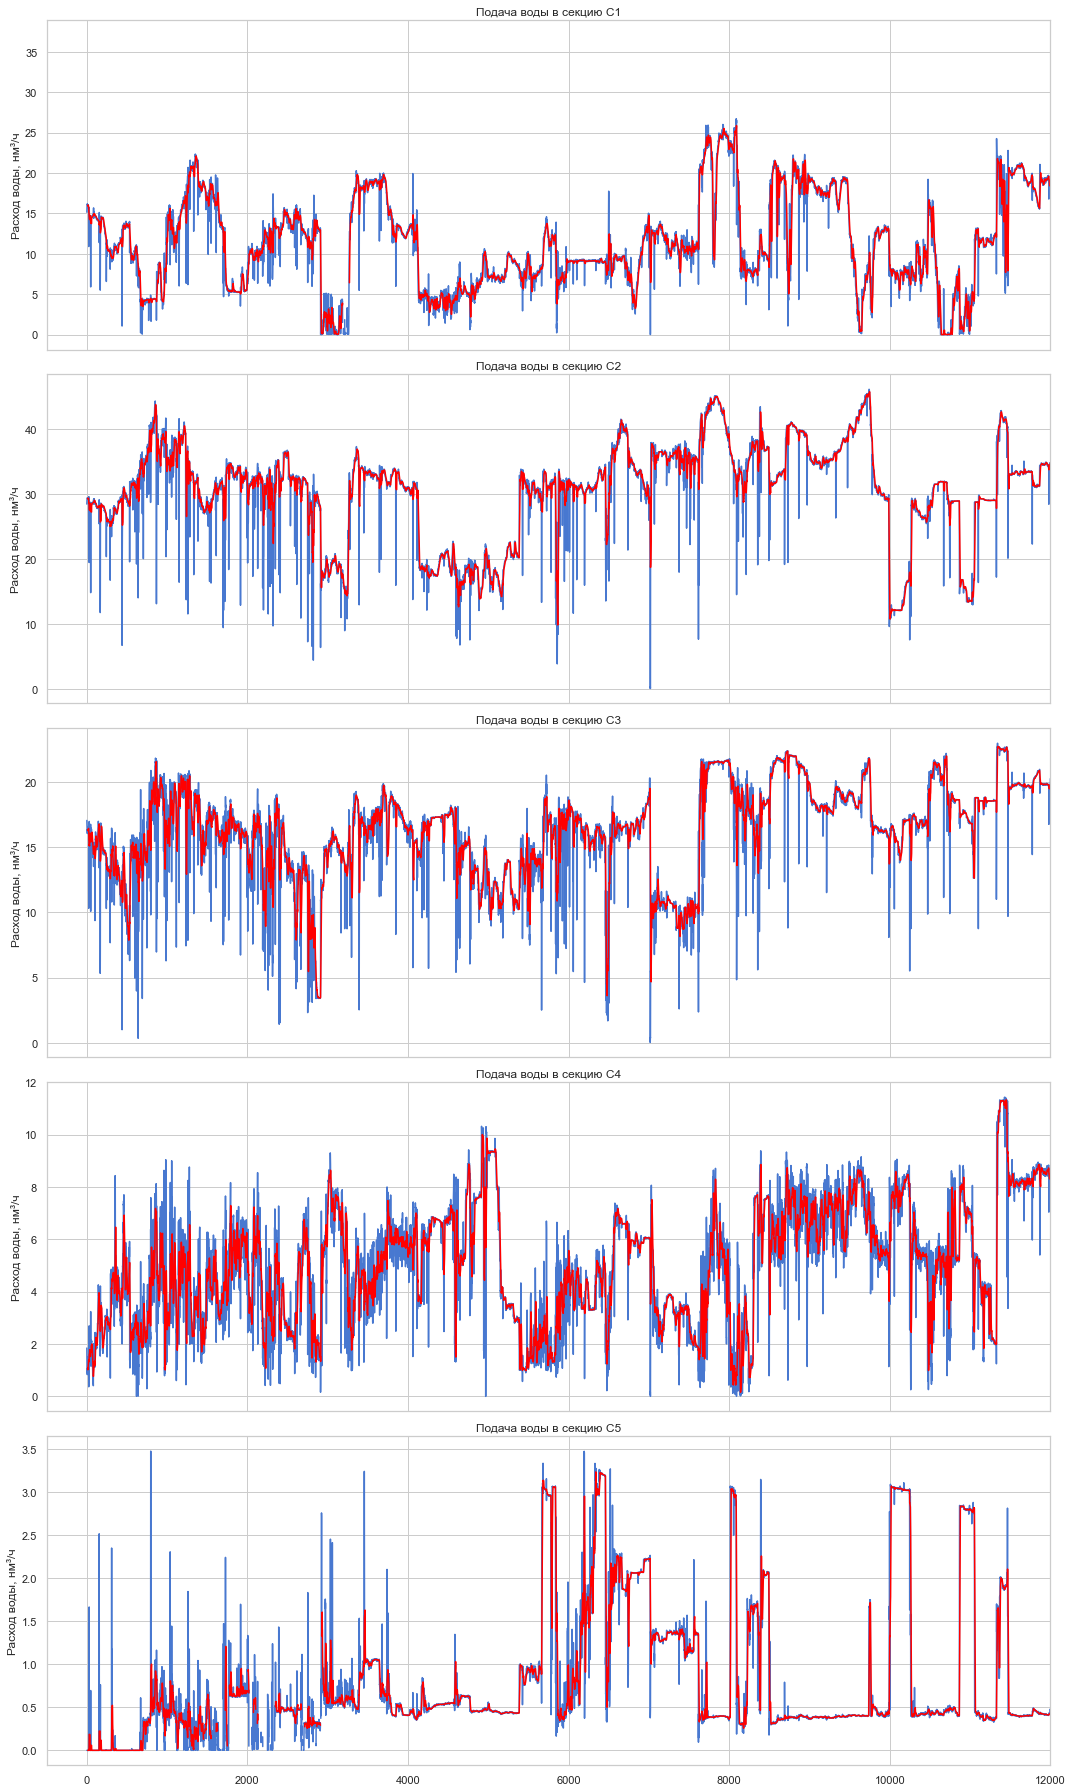

In [63]:
f, ax = plt.subplots(5, 1, figsize=(15,25), sharex=True)

for i, col in enumerate(QQ_cols[:-1]):
    ax[i].plot(df_work[col].values)
    rolling_mean = df_work[col].rolling(window=12).mean()
    ax[i].plot(rolling_mean.values, c='red')
    ax[i].set_title(f'Подача воды в секцию {col[-2:]}')
    ax[i].set_ylabel('Расход воды, нм³/ч')

ax[4].set_xlim(-500, 12000)

f.tight_layout();

plt.show();

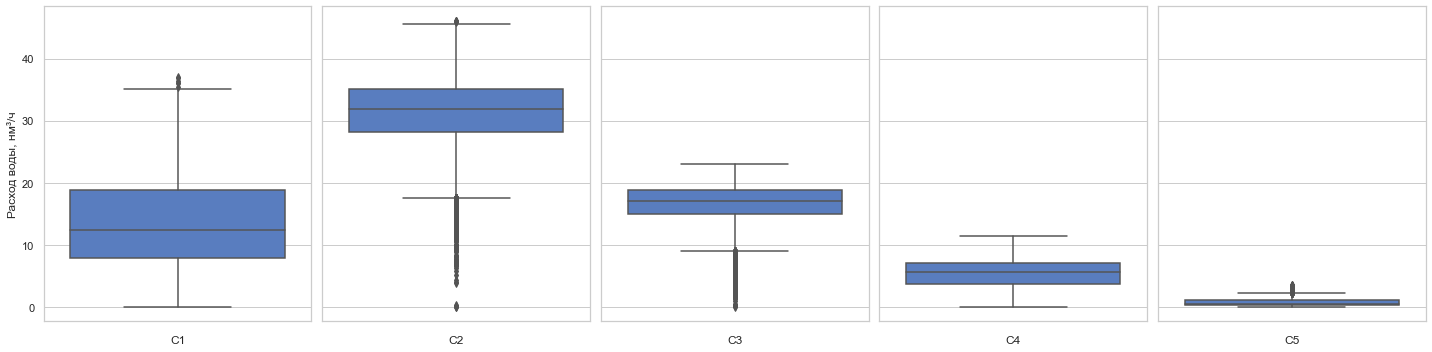

In [64]:
f, ax = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

for i, col in enumerate(QQ_cols[:-1]):
    sns.boxplot(data=df_work, y=col, ax=ax[i])
    ax[i].set_ylabel('')
    ax[0].set_ylabel('Расход воды, нм³/ч')
    ax[i].set_xlabel(col[-2:])

f.tight_layout();

plt.show();

### Температура

In [65]:
T_cols = [
    'T_C1',
    'T_C2',
    'T_C3',
    'T_C4',
    'T_C5',
    'T_abg'
]

In [66]:
df_work[T_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
T_C1,"15,962.00",220.83,8.02,76.33,219.99,223.90,224.99,231.48
T_C2,"15,962.00",221.04,9.11,75.95,220.08,224.68,225.02,233.32
T_C3,"15,962.00",219.01,14.31,74.77,220.01,224.01,225.02,232.07
T_C4,"15,962.00",221.52,7.39,71.39,220.01,223.85,225.00,232.19
T_C5,"15,962.00",216.09,11.03,63.99,213.76,219.38,223.19,232.21
T_abg,"15,962.00",223.25,3.16,44.30,222.57,223.65,224.53,231.40


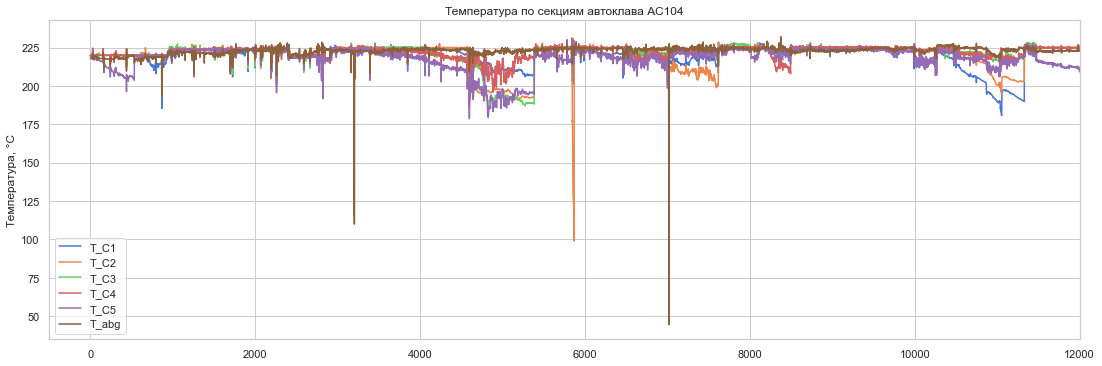

In [67]:
f, ax = plt.subplots(figsize=(15,5))

for col in T_cols:
    ax.plot(df_work[col].values)

f.tight_layout();

ax.set_title('Температура по секциям автоклава АС104')
ax.set_ylabel('Температура, °С')
ax.set_xlim(-500, 12000)

ax.legend(T_cols)

plt.show();

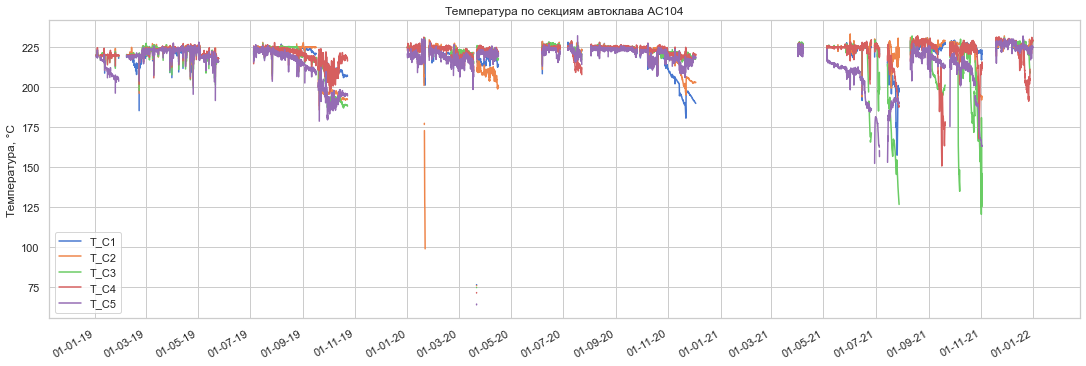

In [99]:
f, ax = plt.subplots(figsize=(15,5))

for col in T_cols[:-1]:
    ax.plot(df_work[col].resample('H').first().fillna(value=np.nan))

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

f.autofmt_xdate();
f.tight_layout();

ax.set_title('Температура по секциям автоклава АС104')
ax.set_ylabel('Температура, °С')

ax.legend(T_cols[:-1])

plt.show();

Посмотрим где температура не отличается от 225 °С более чем на 10 градусов.

In [69]:
for col in T_cols[:-1]:
    delta = 5
    print(f'Для секции {col} значений с разницей меньше {delta} °С: {df_work.loc[(-df_work[col] + 225) <=delta, [col]].count()[0]}')

Для секции T_C1 значений с разницей меньше 5 °С: 11786
Для секции T_C2 значений с разницей меньше 5 °С: 12566
Для секции T_C3 значений с разницей меньше 5 °С: 12058
Для секции T_C4 значений с разницей меньше 5 °С: 12055
Для секции T_C5 значений с разницей меньше 5 °С: 7348


Получается что хуже всего температура измеряется в секциях c 1 по 5. Там меньше половины точек больше 220 °С.

#### Взаимосвязь воды и температуры

Выберем те данные в которых температура по секциям была выше 220 °С. По всем секциям.

In [70]:
df_corr_T_QQ = df_work.loc[
    (df_work["T_C1"] >= 220)
    & (df_work["T_C2"] >= 220)
    & (df_work["T_C3"] >= 220)
    & (df_work["T_C4"] >= 220)
    & (df_work["T_C5"] >= 220),
    T_cols + QQ_cols[:-1],
]

In [71]:
df_corr_T_QQ.describe().T

,count,mean,std,min,25%,50%,75%,max
T_C1,"6,184.00",224.65,1.73,220.00,223.92,224.90,225.02,231.48
T_C2,"6,184.00",225.12,1.45,220.27,224.08,224.98,225.05,232.13
T_C3,"6,184.00",225.41,1.56,220.09,224.21,225.00,225.68,232.07
T_C4,"6,184.00",225.16,1.77,220.00,224.04,224.82,225.38,232.19
T_C5,"6,184.00",223.47,1.72,220.00,222.61,223.43,224.08,232.05
T_abg,"6,184.00",223.74,3.13,109.95,223.00,223.91,224.68,230.21
QQ_C1,"6,151.00",14.83,6.76,0.00,9.14,16.11,19.73,37.04
QQ_C2,"6,184.00",32.85,5.92,7.08,30.17,32.83,36.02,45.58
QQ_C3,"6,184.00",17.75,2.62,0.25,16.23,17.75,19.43,22.95
QQ_C4,"6,184.00",5.41,2.08,0.01,4.01,5.49,6.74,11.43


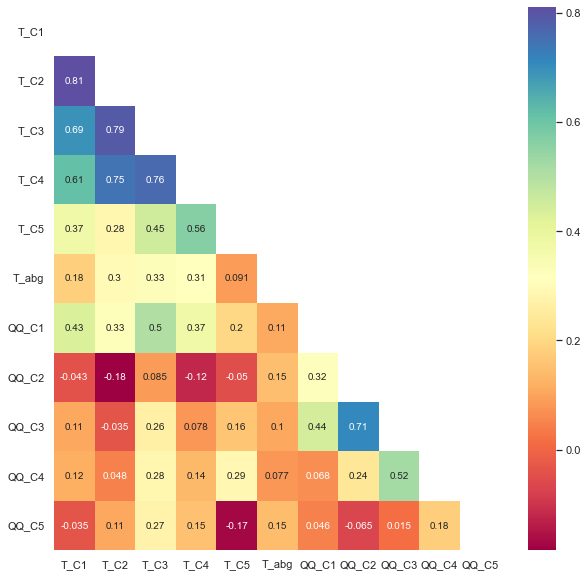

In [72]:
corr = df_corr_T_QQ.corr()

mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='Spectral', mask=mask);
plt.yticks(rotation=0)
plt.show()

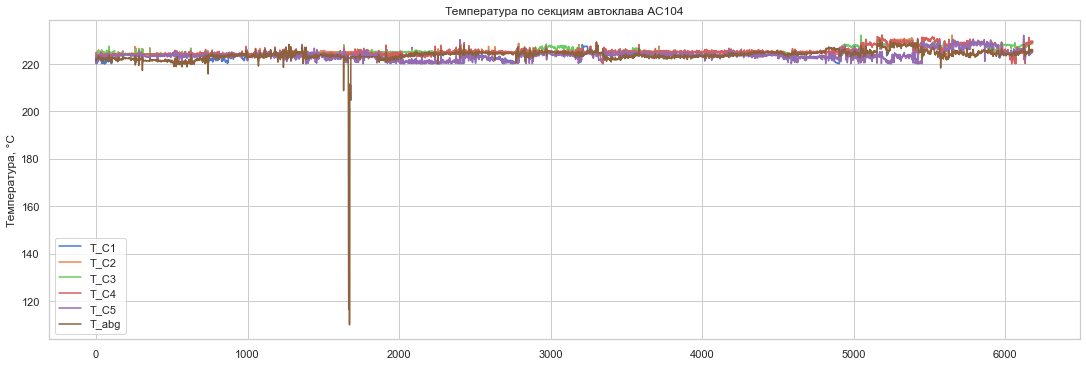

In [73]:
f, ax = plt.subplots(figsize=(15,5))

for col in T_cols:
    ax.plot(df_corr_T_QQ[col].values)

f.tight_layout();

ax.set_title('Температура по секциям автоклава АС104')
ax.set_ylabel('Температура, °С')

ax.legend(T_cols)

plt.show();

Посмотрим распределение температур по секциям, для отобранных данных.

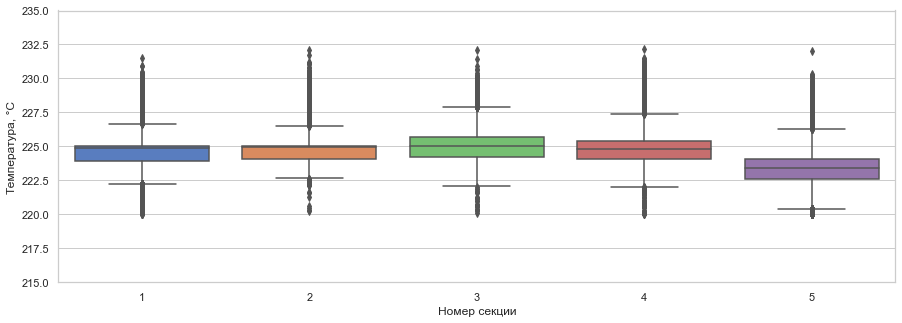

In [74]:
cdf = pd.concat(
    [
        df_corr_T_QQ[["T_C1"]].assign(S=1),
        df_corr_T_QQ[["T_C2"]].assign(S=2),
        df_corr_T_QQ[["T_C3"]].assign(S=3),
        df_corr_T_QQ[["T_C4"]].assign(S=4),
        df_corr_T_QQ[["T_C5"]].assign(S=5),
    ]
)

mdf = pd.melt(cdf, id_vars="S")

f, ax = plt.subplots(figsize=(15, 5))

ax = sns.boxplot(data=mdf, y="value", x="S")
ax.set_ylabel("Температура, °С")
ax.set_xlabel("Номер секции")
ax.set_ylim([215, 235])

plt.show()

А теперь посмотрим во времени, когда температурные датчики автоклава показывали корректные значения.

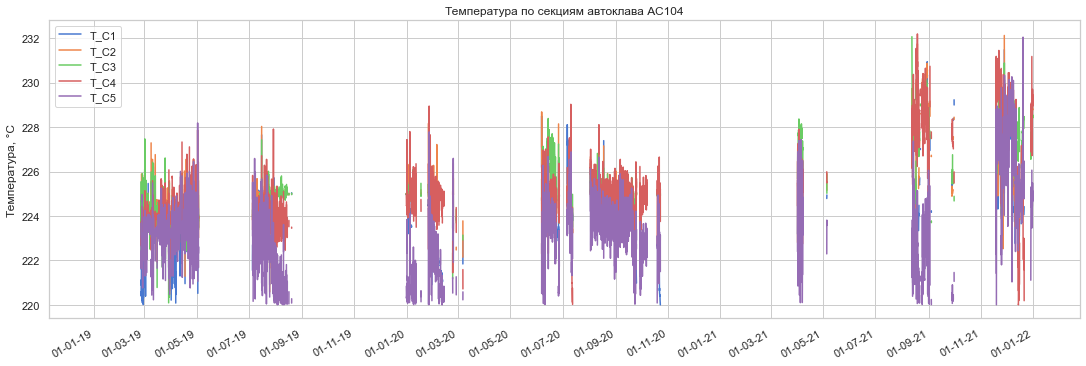

In [76]:
f, ax = plt.subplots(figsize=(15,5))

for col in T_cols[:-1]:
    ax.plot(df_corr_T_QQ[col].resample('H').first().fillna(value=np.nan))

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    
f.autofmt_xdate();
f.tight_layout();

ax.set_title('Температура по секциям автоклава АС104')
ax.set_ylabel('Температура, °С')

ax.legend(T_cols[:-1])

plt.show();

### Давление в автоклаве и расход кислорода

In [77]:
O2_cols = [
    'O2_C1',
    'O2_C2',
    'O2_C3',
    'O2_C4',
    'O2_C5',
    'O2_conc_1',
    'O2_conc_2',
]

P_cols = [
    'P_H2O',
    'P_O2',
    'P_tot',
    'P_valve'
]

Посмотрим общие статистики по подаче кислорода.

In [78]:
df_work[O2_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
O2_C1,"15,962.00","2,124.38",341.74,-0.69,"1,903.04","2,080.07","2,274.96","3,100.13"
O2_C2,"15,962.00","1,934.01",285.82,-0.12,"1,749.76","1,877.08","2,127.98","2,702.88"
O2_C3,"15,962.00",963.46,177.10,-0.29,849.28,950.92,"1,060.80","1,509.80"
O2_C4,"15,962.00",360.93,104.83,-0.36,300.17,369.96,420.02,724.16
O2_C5,"15,962.00",149.95,38.39,-0.50,119.99,150.02,171.98,311.61
O2_conc_1,"15,415.00",88.94,28.75,0.00,95.00,99.80,99.90,100.00
O2_conc_2,"15,167.00",90.00,29.28,0.00,99.38,99.54,99.70,100.00


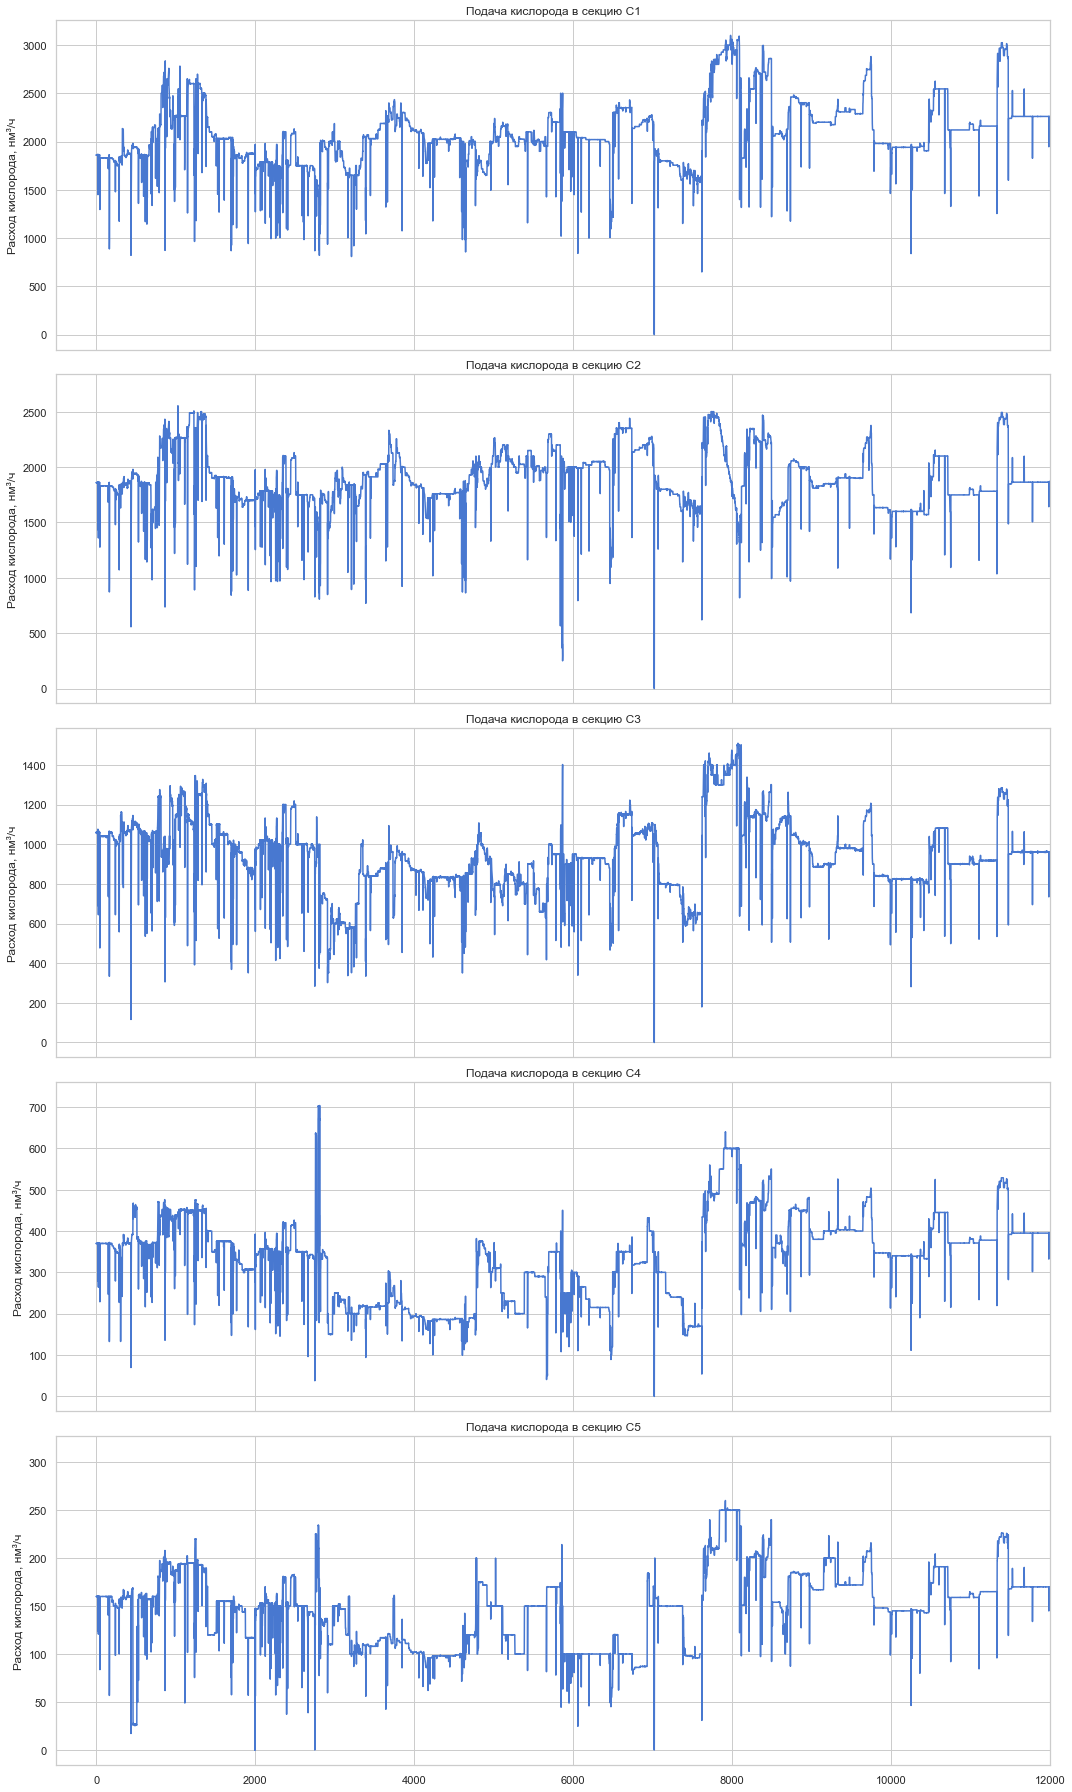

In [79]:
f, ax = plt.subplots(5, 1, figsize=(15,25), sharex=True)

for i, col in enumerate(O2_cols[:-2]):
    ax[i].plot(df_work[col].values)
    # rolling_mean = df_work[col].rolling(window=24).mean()
    # ax[i].plot(rolling_mean.values, c='red')
    ax[i].set_title(f'Подача кислорода в секцию {col[-2:]}')
    ax[i].set_ylabel('Расход кислорода, нм³/ч')

ax[4].set_xlim(-500, 12000)
f.tight_layout();

plt.show();

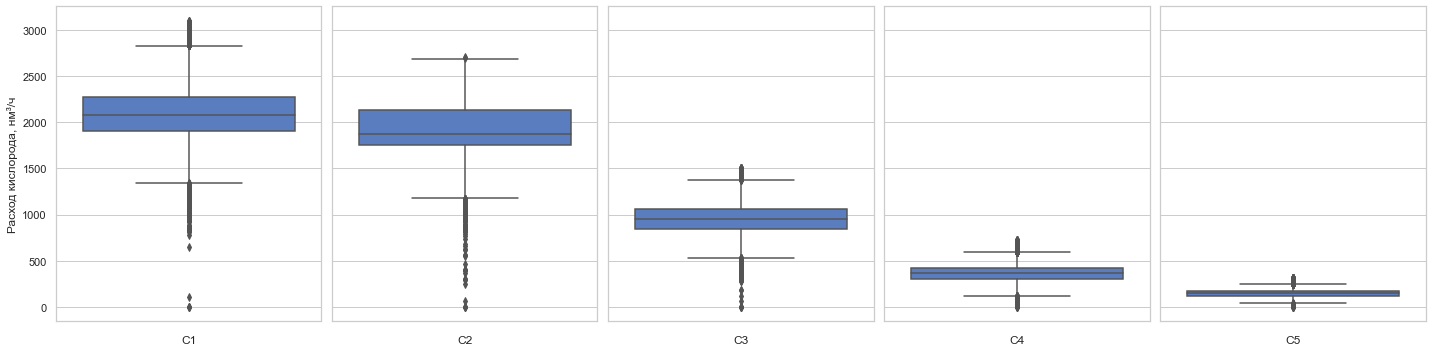

In [80]:
f, ax = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

for i, col in enumerate(O2_cols[:-2]):
    sns.boxplot(data=df_work, y=col, ax=ax[i])
    ax[i].set_ylabel('')
    ax[0].set_ylabel('Расход кислорода, нм³/ч')
    ax[i].set_xlabel(col[-2:])

f.tight_layout();

plt.show();

Данные по чистоте кислорода использовать, скорее всего, нецелесообразно ввиду их практически постоянства.

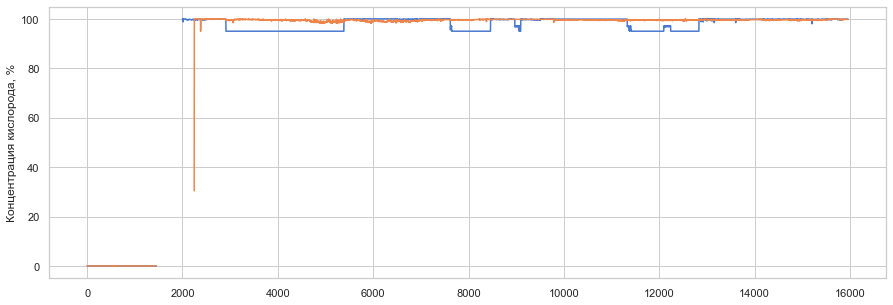

In [81]:
f, ax = plt.subplots(figsize=(15,5))

plt.plot(df_work['O2_conc_1'].values)
plt.plot(df_work['O2_conc_2'].values)

ax.set_ylabel('Концентрация кислорода, %')

plt.show();

Давление P_tot и P_tot_2 целесообразно объединить в одно значение, взяв среднее.

In [82]:
df_work = df_work.assign(P_tot = df_work[['P_tot', 'P_tot_2']].mean(axis=1))

In [83]:
df_work.drop('P_tot_2', inplace=True, axis=1)

Посмотрим общие статистики по давлению

In [84]:
df_work[P_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
P_H2O,"15,961.00",24.58,0.91,1.44,24.20,24.70,25.13,28.61
P_O2,"15,962.00",6.27,0.72,1.67,5.84,6.25,6.69,9.16
P_tot,"15,962.00",29.85,0.66,0.93,30.00,30.00,30.01,31.51
P_valve,"15,960.00",44.35,24.49,0.93,22.95,43.17,64.78,100.00


Скорее всего общее давление можно вообще удалить, так как это точно линейная комбинация давления паров воды и парциального давления кислорода.

In [85]:
df_work[df_work['P_H2O']<5]

,Fel_1,Fel_2,D_SL,QQ_C1,QQ_C2,QQ_C3,QQ_C4,QQ_C5,O2_tot,QQ_tot,...,Corg,Ctot,Fe2+,D_S,D_SL_H,Fel_sum,C_S,Q_SL,G_S,G_Seq
2020-03-21 23:00:00,23.84,24.36,"1,653.66",0.26,0.19,0.37,0.01,0.48,-1.51,1.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df_work.loc['2020-03-21 23:00:00', 'P_H2O'] = np.NaN
df_work['P_H2O'].interpolate(method='time', inplace=True)


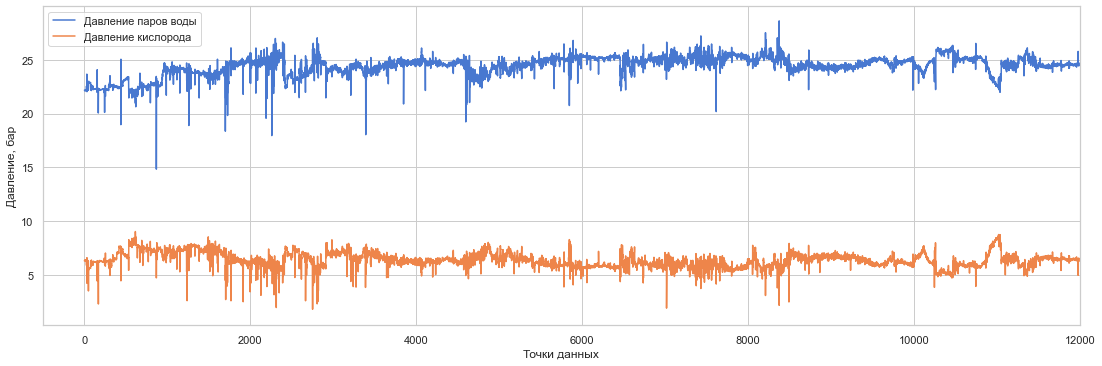

In [88]:
f, ax = plt.subplots(figsize=(15,5))

for col in ['P_H2O', 'P_O2']:
    ax.plot(df_work[col].values)

f.tight_layout();

ax.set_ylabel('Давление, бар')
ax.set_xlabel('Точки данных')
ax.set_xlim(-500, 12000)

ax.legend(['Давление паров воды', 'Давление кислорода'])

plt.show();

Посмотрим распределение давления кислорода и паров воды.

Text(0, 0.5, 'Давление кислорода, бар')

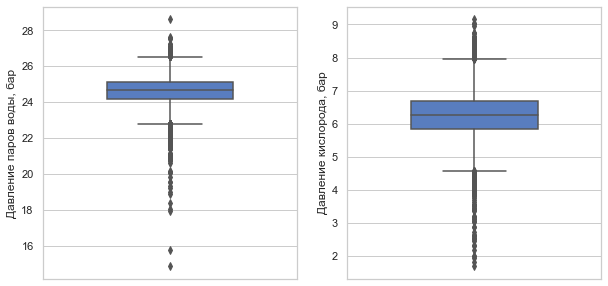

In [89]:
f, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=df_work, y="P_H2O", ax=axs[0], width=0.5)
sns.boxplot(data=df_work, y="P_O2", ax=axs[1], width=0.5)

axs[0].set_ylabel('Давление паров воды, бар')
axs[1].set_ylabel('Давление кислорода, бар')


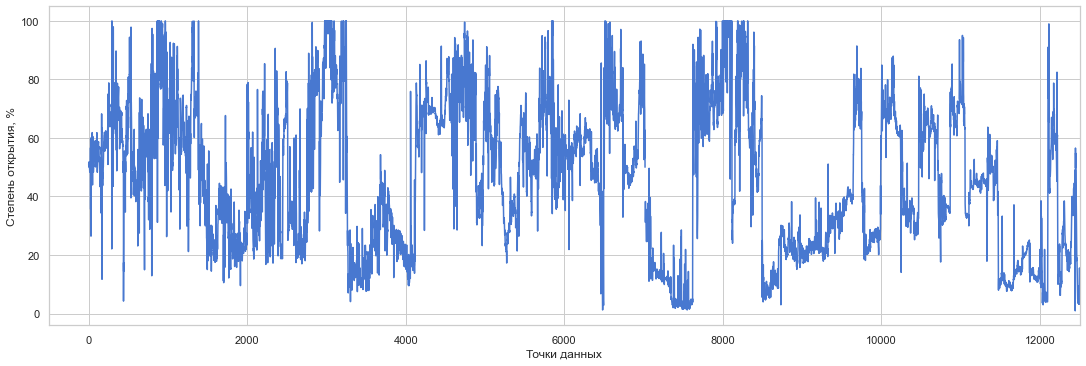

In [90]:
f, ax = plt.subplots(figsize=(15,5))

ax.plot(df_work['P_valve'].values)

f.tight_layout();

ax.set_ylabel('Степень открытия, %')
ax.set_xlabel('Точки данных')
ax.set_xlim(-500, 12500)

plt.show();

А теперь посмотрим корреляции и для начала выберем нужные колонки с данными

In [91]:
corr_cols = [
    'O2_C1',
    'O2_C2',
    'O2_C3',
    'O2_C4',
    'O2_C5',
    'P_H2O',
    'P_O2',
    'P_valve',
    'QQ_C1',
    'QQ_C2',
    'QQ_C3',
    'QQ_C4',
    'QQ_C5',
    'Fe',
    'Stot',
    'As',
    'Corg',
    'Ctot',
    'Fe2+'
]

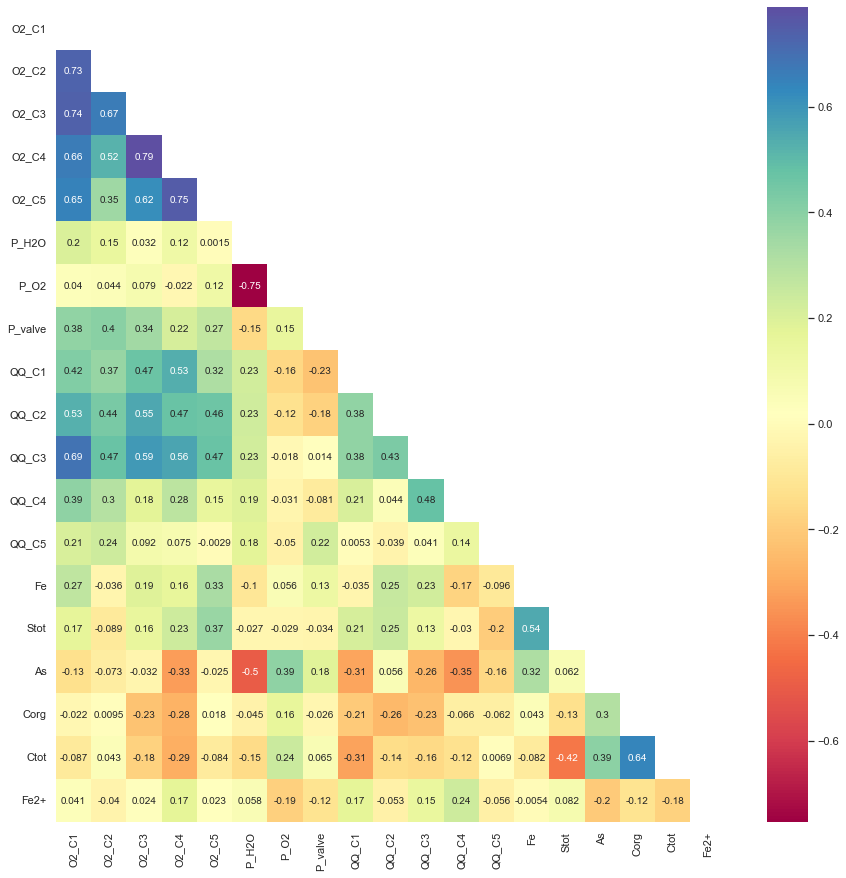

In [92]:
corr = df_work[corr_cols].corr()

mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="Spectral", mask=mask);
plt.yticks(rotation=0)
plt.show();

### Уровень в автоклаве и клапан сброса

In [93]:
l_cols = [
    'AC_level',
    'AC_valve_open'
]

In [94]:
df_work[l_cols].describe()

,AC_level,AC_valve_open
count,"15,962.00","15,958.00"
mean,65.84,33.00
std,6.47,24.80
min,44.91,0.00
25%,58.10,10.31
50%,69.95,27.78
75%,70.01,49.69
max,85.39,100.00


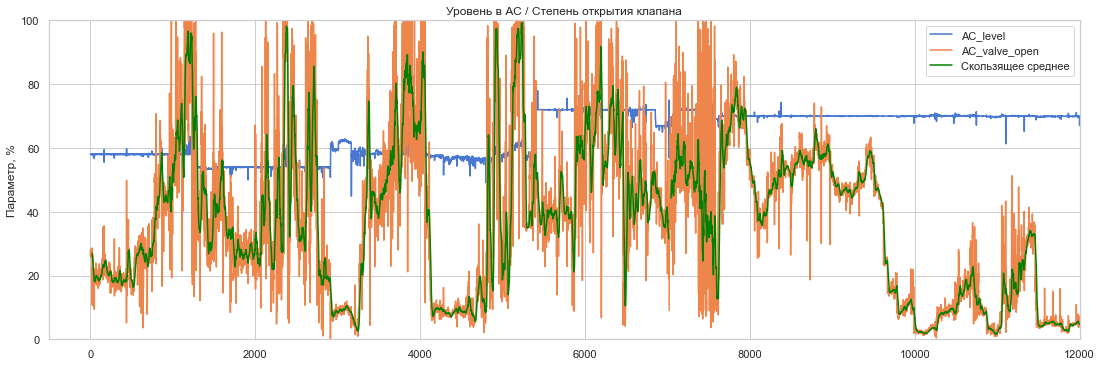

In [95]:
f, ax = plt.subplots(figsize=(15,5))

for col in l_cols:
    ax.plot(df_work[col].values)

rolling_mean = df_work['AC_valve_open'].rolling(window=24).mean()
ax.plot(rolling_mean.values, c='green')

f.tight_layout();

ax.set_title('Уровень в АС / Степень открытия клапана')
ax.set_ylabel('Параметр, %')
ax.set_ylim([0, 100])
ax.set_xlim(-500, 12000)

ax.legend(l_cols + ['Скользящее среднее'])

plt.show();

## Сохраним итоговый файл для дальнейших расчётов¶

In [96]:
df_work[df_work < 0] = 0

In [97]:
df_work.describe().T

,count,mean,std,min,25%,50%,75%,max
Fel_1,"13,435.00",29.26,17.92,0.00,20.69,37.46,43.46,50.55
Fel_2,"12,477.00",27.39,19.16,0.00,0.00,31.42,44.52,50.52
D_SL,"15,962.00","1,565.95",245.32,975.12,"1,592.18","1,634.73","1,680.56","2,032.16"
QQ_C1,"15,925.00",13.31,7.05,0.00,7.89,12.36,18.88,37.04
QQ_C2,"15,962.00",30.69,6.93,0.03,28.11,31.80,35.14,46.08
QQ_C3,"15,962.00",16.61,3.38,0.02,14.93,17.05,18.86,22.95
QQ_C4,"15,962.00",5.45,2.29,0.00,3.65,5.58,7.15,11.43
QQ_C5,"15,661.00",0.89,0.80,0.00,0.40,0.51,1.14,3.48
O2_tot,"15,962.00","5,532.72",830.10,0.00,"4,996.42","5,353.49","5,955.25","7,559.17"
QQ_tot,"15,962.00",66.91,14.41,0.35,58.32,66.23,77.85,104.48


In [98]:
comp = {
        'method': 'zip',
        'archive_name': 'out.csv'
    }

filepath = Path(f'./{WORK_DIR}/df_work_ds_final.zip')

df_work.to_csv(filepath, compression=comp)